In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import probplot, norm, t
import seaborn as sns
sns.set(rc={'figure.figsize':(100,10)})
import numpy as np
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [44]:
data = pd.read_csv('steam_processada_parcial.csv')

In [45]:
#colunas = ['positive_ratings', 'negative_ratings', 'price']
colunas = ['price', 'positive_ratings']

In [46]:
data.loc[:, colunas].head()

,price,positive_ratings
0,7.19,124534
1,3.99,3318
2,3.99,3416
3,3.99,1273
4,3.99,5250


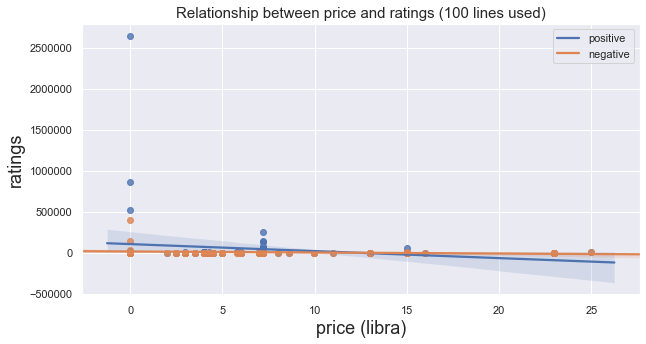

In [47]:
#simple regress with seaborn
sns.set(color_codes=True)
#sns.regplot(x="price", y="positive_ratings", data = data[:30]);
sns.set(rc={'figure.figsize':(10,5)})
sns.regplot(x="price", y="positive_ratings", data = data[:100]);
sns.regplot(x="price", y="negative_ratings", data = data[:100]);


plt.legend(labels=['positive','negative'])
plt.title('Relationship between price and ratings (100 lines used)', size=15)
plt.xlabel('price (libra)', size=18)
plt.ylabel('ratings', size=18);


In [48]:
#beta^0 e beta^1
df =  pd.read_csv('steam_processada_parcial.csv')
x = df['price']# pegar somente 30 linhas
y = df['positive_ratings']

yb = y.mean()
xb = x.mean()

Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()

b1 = Sxy/Sxx
b0 = yb - b1*xb

print("beta0: {0}".format(b0))
print("beta1: {0}".format(b1))

beta0: 471.32611908127353
beta1: 87.07067856993659


In [49]:
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v

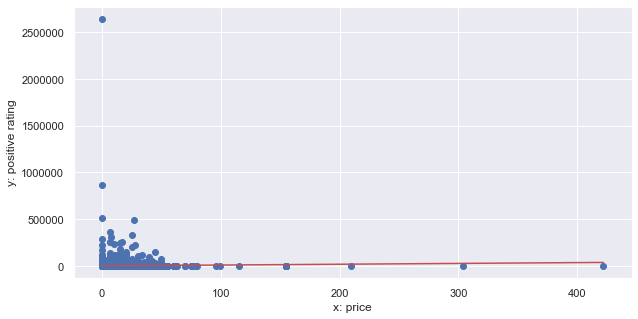

In [50]:
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados
plt.xlabel("x: price");
plt.ylabel("y: positive rating");

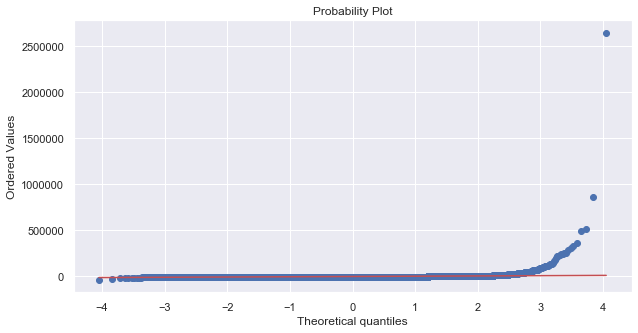

In [51]:
e = y - (b0 + b1*x) # Escreva sua fórmula dos resíduos aqui

stats.probplot(e, dist='norm', plot=plt); # Verifique graficamente  se é uma normal - como fazer isso?

In [52]:
import statsmodels.api as sm # Importe da biblioteca

x = df['price'] # Definindo renda como explicativa
y = df['positive_ratings']    # Definindo CO2 como resposta

xc = sm.add_constant(x) # Adiciona coluna de 1s para estimar intercepto
model = sm.OLS(y,xc)    # Define o modelo
results = model.fit()   # Faz o ajuste
results.summary()       # Mostra os resultados

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       positive_ratings   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     35.35
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           2.79e-09
Time:                        21:05:21   Log-Likelihood:            -3.0513e+05
No. Observations:               27075   AIC:                         6.103e+05
Df Residuals:                   27073   BIC:                         6.103e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        471.3261    145.687      3.235      0.001     185.772     756.880
price         87.0707     14.645      5.945      0.000      58.365     115.776
==============================================================================
Omnibus:                   109697.248   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     225381231601.452
Skew:                         106.361   Prob(JB):                         0.00
Kurtosis:                   14135.893   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

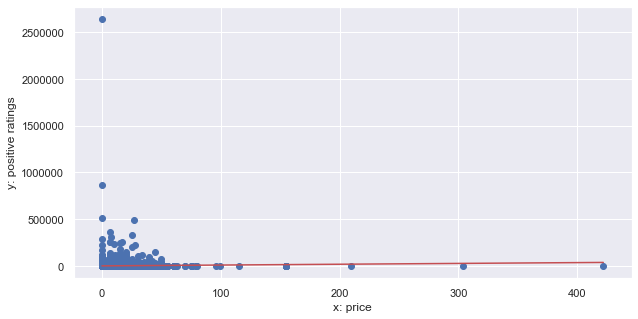

In [53]:
x_vc = sm.add_constant(x_v)
y_vc = results.predict(x_vc)
plt.plot(x_v, y_vc, color="r")
plt.scatter(x,y);
plt.xlabel("x: price");
plt.ylabel("y: positive ratings");

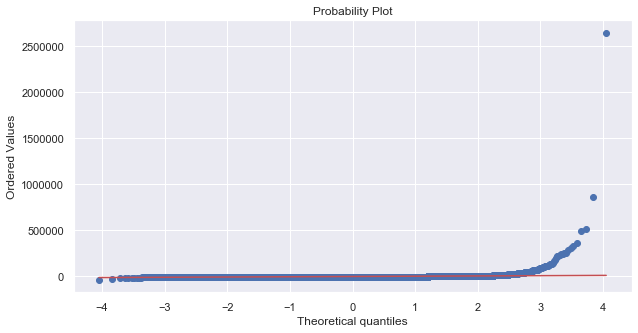

In [54]:
stats.probplot(results.resid, dist="norm", plot=plt);

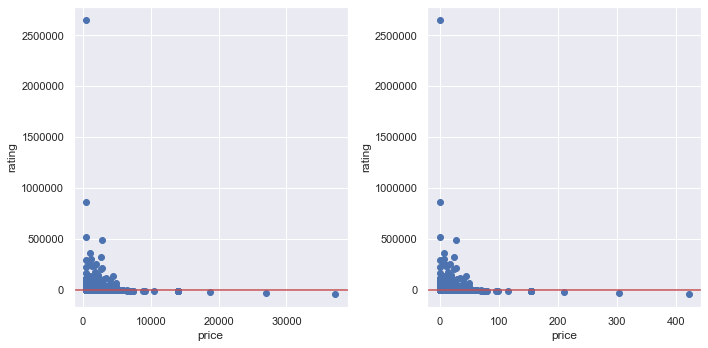

In [55]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(results.predict(xc),results.resid); #xc contem matriz de planejamento usada no ajuste OLS 
plt.axhline(y=0, color='r', linestyle='-');
plt.ylabel('rating')
plt.xlabel('price')

plt.subplot(122)
plt.scatter(x,results.resid); #x contem apenas a variável independente utilizada no ajuste linear
plt.axhline(y=0, color='r', linestyle='-');
plt.ylabel('rating')
plt.xlabel('price')

plt.tight_layout()
plt.show()

In [56]:
#beta^0 e beta^1
df =  pd.read_csv('steam_processada_parcial.csv')
x = df['price']# pegar somente 30 linhas
y = df['negative_ratings']

yb = y.mean()
xb = x.mean()

Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()

b1 = Sxy/Sxx
b0 = yb - b1*xb

print("beta0: {0}".format(b0))
print("beta1: {0}".format(b1))

beta0: 41.49947809720945
beta1: 27.891128836445176


In [57]:
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v

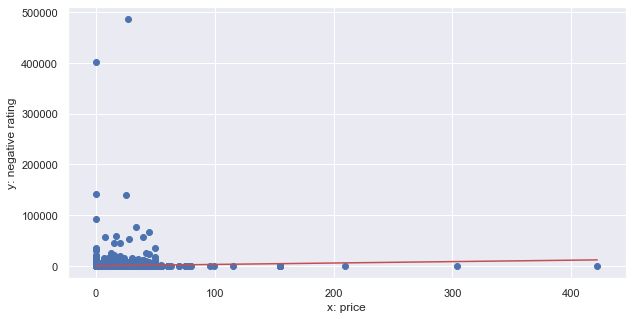

In [58]:
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados
plt.xlabel("x: price");
plt.ylabel("y: negative rating");

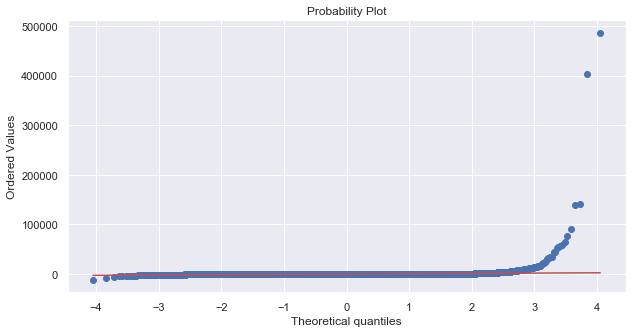

In [59]:
e = y - (b0 + b1*x) # Escreva sua fórmula dos resíduos aqui

stats.probplot(e, dist='norm', plot=plt); # Verifique graficamente  se é uma normal - como fazer isso?

In [61]:
x = df['price'] # Definindo renda como explicativa
y = df['negative_ratings']    # Definindo CO2 como resposta

xc = sm.add_constant(x) # Adiciona coluna de 1s para estimar intercepto
model = sm.OLS(y,xc)    # Define o modelo
results = model.fit()   # Faz o ajuste
results.summary()       # Mostra os resultados

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       negative_ratings   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     71.32
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           3.19e-17
Time:                        21:07:32   Log-Likelihood:            -2.6481e+05
No. Observations:               27075   AIC:                         5.296e+05
Df Residuals:                   27073   BIC:                         5.296e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.4995     32.853      1.263      0.207     -22.895     105.894
price         27.8911      3.303      8.445      0.000      21.418      34.364
==============================================================================
Omnibus:                   103499.078   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      94397338898.114
Skew:                          88.788   Prob(JB):                         0.00
Kurtosis:                    9148.752   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

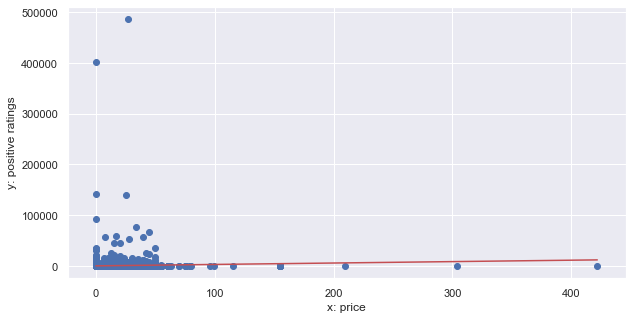

In [62]:
x_vc = sm.add_constant(x_v)
y_vc = results.predict(x_vc)
plt.plot(x_v, y_vc, color="r")
plt.scatter(x,y);
plt.xlabel("x: price");
plt.ylabel("y: positive ratings");

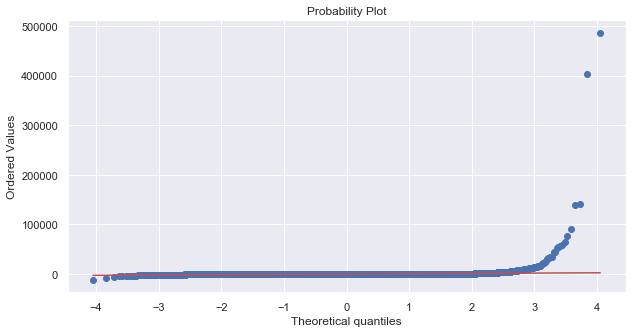

In [63]:
stats.probplot(results.resid, dist="norm", plot=plt);

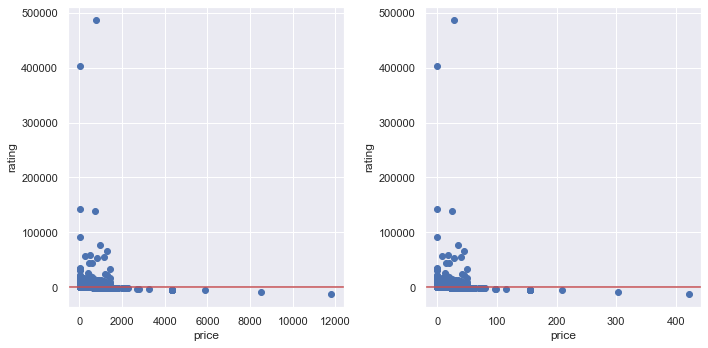

In [64]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(results.predict(xc),results.resid); #xc contem matriz de planejamento usada no ajuste OLS 
plt.axhline(y=0, color='r', linestyle='-');
plt.ylabel('rating')
plt.xlabel('price')

plt.subplot(122)
plt.scatter(x,results.resid); #x contem apenas a variável independente utilizada no ajuste linear
plt.axhline(y=0, color='r', linestyle='-');
plt.ylabel('rating')
plt.xlabel('price')

plt.tight_layout()
plt.show()